<a href="https://colab.research.google.com/github/Swapnil-Giram/Clustring/blob/main/migration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### About The data

Data showing the movement of LinkedIn members across the world at the country, industry, and skill level.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
import seaborn as sns

### Loding Data

In [3]:
data = '/content/drive/MyDrive/skill_migration_public.csv'

In [4]:
df = pd.read_csv(data)

In [5]:
df.columns

Index(['country_code', 'country_name', 'wb_income', 'wb_region',
       'skill_group_id', 'skill_group_category', 'skill_group_name',
       'net_per_10K_2015', 'net_per_10K_2016', 'net_per_10K_2017',
       'net_per_10K_2018', 'net_per_10K_2019', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28'],
      dtype='object')

### Data Cleaning

In [6]:
# droping the unnamed columns
df.drop(['Unnamed: 12','Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28'],axis=1,inplace=True)

In [7]:
df.head()

,country_code,country_name,wb_income,wb_region,skill_group_id,skill_group_category,skill_group_name,net_per_10K_2015,net_per_10K_2016,net_per_10K_2017,net_per_10K_2018,net_per_10K_2019
0,af,Afghanistan,Low income,South Asia,2549.0,Tech Skills,Information Management,-791.59,-705.88,-550.04,-680.92,-1208.79
1,af,Afghanistan,Low income,South Asia,2608.0,Business Skills,Operational Efficiency,-1610.25,-933.55,-776.06,-532.22,-790.09
2,af,Afghanistan,Low income,South Asia,3806.0,Specialized Industry Skills,National Security,-1731.45,-769.68,-756.59,-600.44,-767.64
3,af,Afghanistan,Low income,South Asia,50321.0,Tech Skills,Software Testing,-957.50,-828.54,-964.73,-406.50,-739.51
4,af,Afghanistan,Low income,South Asia,1606.0,Specialized Industry Skills,Navy,-1510.71,-841.17,-842.32,-581.71,-718.64


In [41]:
df.isna().sum() # cheacking a null values

country_code            3030
country_name            3030
wb_income               3030
wb_region               3030
skill_group_id          3030
skill_group_category    3030
skill_group_name        3030
net_per_10K_2015        3030
net_per_10K_2016        3030
net_per_10K_2017        3030
net_per_10K_2018        3030
net_per_10K_2019        3030
dtype: int64

In [43]:
# droping the null values
df.dropna(inplace=True)

In [45]:
df.isnull().sum()

country_code            0
country_name            0
wb_income               0
wb_region               0
skill_group_id          0
skill_group_category    0
skill_group_name        0
net_per_10K_2015        0
net_per_10K_2016        0
net_per_10K_2017        0
net_per_10K_2018        0
net_per_10K_2019        0
dtype: int64

In [52]:
df.nunique()

country_code              140
country_name              140
wb_income                   4
wb_region                   7
skill_group_id            249
skill_group_category        5
skill_group_name          249
net_per_10K_2015        15023
net_per_10K_2016        14958
net_per_10K_2017        14863
net_per_10K_2018        14925
net_per_10K_2019        14887
dtype: int64

In [48]:
df.columns

Index(['country_code', 'country_name', 'wb_income', 'wb_region',
       'skill_group_id', 'skill_group_category', 'skill_group_name',
       'net_per_10K_2015', 'net_per_10K_2016', 'net_per_10K_2017',
       'net_per_10K_2018', 'net_per_10K_2019'],
      dtype='object')

In [33]:
for column in df.columns:
  print('---------------------------')
  print(df[column].value_counts())

---------------------------
country_code
us    249
gb    249
ca    245
au    244
fr    241
     ... 
ye     34
ga     33
bf     27
bj     23
tg     17
Name: count, Length: 140, dtype: int64
---------------------------
country_name
United States     249
United Kingdom    249
Canada            245
Australia         244
France            241
                 ... 
Yemen, Rep.        34
Gabon              33
Burkina Faso       27
Benin              23
Togo               17
Name: count, Length: 140, dtype: int64
---------------------------
wb_income
High income            8904
Upper middle income    4335
Lower middle income    3240
Low income             1138
Name: count, dtype: int64
---------------------------
wb_region
Europe & Central Asia         6222
East Asia & Pacific           2872
Middle East & North Africa    2659
Latin America & Caribbean     2502
Sub-Saharan Africa            1993
South Asia                     875
North America                  494
Name: count, dtype: int64
---

In [27]:
df['country_name'].value_counts() # 4 types of income group

country_name
United States     249
United Kingdom    249
Canada            245
Australia         244
France            241
                 ... 
Yemen, Rep.        34
Gabon              33
Burkina Faso       27
Benin              23
Togo               17
Name: count, Length: 140, dtype: int64

In [57]:
mean_by_country = df.groupby('country_name')[['net_per_10K_2015', 'net_per_10K_2016', 'net_per_10K_2017', 'net_per_10K_2018', 'net_per_10K_2019']].mean()
mean_by_country.head(5)

,net_per_10K_2015,net_per_10K_2016,net_per_10K_2017,net_per_10K_2018,net_per_10K_2019
country_name,,,,,
Afghanistan,-694.542870,-538.155000,-510.329722,-195.141019,-332.653704
Albania,-337.399559,-387.173235,-349.376912,-261.745588,-305.108971
Algeria,-130.277312,-156.095591,-576.019032,-226.591075,-287.414301
Angola,85.876702,-369.449894,-332.112128,-172.161170,46.086489
Argentina,-45.881696,-23.816082,23.737778,38.850058,-99.243509


In [61]:
df.head(5)

,country_code,country_name,wb_income,wb_region,skill_group_id,skill_group_category,skill_group_name,net_per_10K_2015,net_per_10K_2016,net_per_10K_2017,net_per_10K_2018,net_per_10K_2019
0,af,Afghanistan,Low income,South Asia,2549.0,Tech Skills,Information Management,-791.59,-705.88,-550.04,-680.92,-1208.79
1,af,Afghanistan,Low income,South Asia,2608.0,Business Skills,Operational Efficiency,-1610.25,-933.55,-776.06,-532.22,-790.09
2,af,Afghanistan,Low income,South Asia,3806.0,Specialized Industry Skills,National Security,-1731.45,-769.68,-756.59,-600.44,-767.64
3,af,Afghanistan,Low income,South Asia,50321.0,Tech Skills,Software Testing,-957.50,-828.54,-964.73,-406.50,-739.51
4,af,Afghanistan,Low income,South Asia,1606.0,Specialized Industry Skills,Navy,-1510.71,-841.17,-842.32,-581.71,-718.64


In [77]:
a = df.groupby(['country_name','skill_group_category'])[['net_per_10K_2015', 'net_per_10K_2016', 'net_per_10K_2017', 'net_per_10K_2018', 'net_per_10K_2019']].mean()

In [80]:
a.head(50)

net_per_10K_2015  net_per_10K_2016  \
country_name skill_group_category                                              
Afghanistan  Business Skills                   -581.293548       -514.898710   
             Disruptive Tech Skills            -707.437500       -659.545000   
             Soft Skills                       -528.741429       -380.278571   
             Specialized Industry Skills       -809.325849       -573.352642   
             Tech Skills                       -581.947692       -497.773846   
Albania      Business Skills                   -342.231200       -408.652400   
             Disruptive Tech Skills            -441.000000       -500.605000   
             Soft Skills                       -341.036667       -391.996667   
             Specialized Industry Skills       -297.083333       -327.260000   
             Tech Skills                       -393.560909       -445.821818   
Algeria      Business Skills                   -130.112000       -120.486800   
             Disruptive Tech Skills            -210.082500       -275.257500   
             Soft Skills                       -163.905714       -160.078571   
             Specialized Industry Skills       -105.549070       -126.149767   
             Tech Skills                       -166.907857       -275.621429   
Angola       Business Skills                    129.483448       -357.172414   
             Disruptive Tech Skills             127.270000       -406.495000   
             Soft Skills                         95.180000       -152.691429   
             Specialized Industry Skills        -15.470952       -477.285238   
             Tech Skills                        315.985833       -135.790833   
Argentina    Business Skills                    -63.603421        -17.013421   
             Disruptive Tech Skills             -54.881250        -28.152500   
             Soft Skills                        -69.714000        -21.393000   
             Specialized Industry Skills        -32.630103        -21.213505   
             Tech Skills                        -62.640556        -51.621111   
Armenia      Business Skills                   -174.930556       -185.927778   
             Disruptive Tech Skills            -253.385000       -192.325000   
             Soft Skills                       -141.368000       -137.652000   
             Specialized Industry Skills       -196.016429       -159.280714   
             Tech Skills                       -192.945000       -193.627000   
Australia    Business Skills                     21.186341         74.284146   
             Disruptive Tech Skills             112.600000        190.694444   
             Soft Skills                         29.242727         84.516364   
             Specialized Industry Skills         20.764136         64.463642   
             Tech Skills                        104.619524        178.500952   
Austria      Business Skills                    146.068649        120.265676   
             Disruptive Tech Skills             163.638889        183.927778   
             Soft Skills                        212.428000        151.138000   
             Specialized Industry Skills        159.790847        152.819068   
             Tech Skills                        164.503158        149.990000   
Azerbaijan   Business Skills                   -148.765769       -291.318846   
             Disruptive Tech Skills            -114.640000       -223.246667   
             Soft Skills                       -173.840000       -176.747143   
             Specialized Industry Skills       -144.087805       -214.692683   
             Tech Skills                       -112.285000       -272.170833   
Bahamas, The Business Skills                    -27.526667        -38.494762   
             Disruptive Tech Skills             170.910000        109.060000   
             Soft Skills                         76.085000        -23.648333   
             Specialized Industry Skills  

In [85]:
 b = df.groupby(['wb_region','skill_group_category'])[['net_per_10K_2015', 'net_per_10K_2016', 'net_per_10K_2017', 'net_per_10K_2018', 'net_per_10K_2019']].mean()

In [86]:
b.head(50)

net_per_10K_2015  \
wb_region                  skill_group_category                            
East Asia & Pacific        Business Skills                     58.847825   
                           Disruptive Tech Skills              59.973305   
                           Soft Skills                         67.430250   
                           Specialized Industry Skills         31.392732   
                           Tech Skills                         60.694140   
Europe & Central Asia      Business Skills                    -32.035947   
                           Disruptive Tech Skills             -25.790293   
                           Soft Skills                        -13.480055   
                           Specialized Industry Skills         -4.498601   
                           Tech Skills                        -35.154385   
Latin America & Caribbean  Business Skills                    -55.883401   
                           Disruptive Tech Skills            -143.844340   
                           Soft Skills                        -59.099429   
                           Specialized Industry Skills        -72.799803   
                           Tech Skills                       -105.935487   
Middle East & North Africa Business Skills                    -33.385008   
                           Disruptive Tech Skills              29.182500   
                           Soft Skills                        -33.913734   
                           Specialized Industry Skills         27.299810   
                           Tech Skills                         -3.285224   
North America              Business Skills                     13.856341   
                           Disruptive Tech Skills              44.106316   
                           Soft Skills                         13.079545   
                           Specialized Industry Skills         13.197234   
                           Tech Skills                         45.788571   
South Asia                 Business Skills                   -202.538300   
                           Disruptive Tech Skills            -274.560500   
                           Soft Skills                       -173.318367   
                           Specialized Industry Skills       -210.741814   
                           Tech Skills                       -267.163564   
Sub-Saharan Africa         Business Skills                     48.265337   
                           Disruptive Tech Skills              29.256912   
                           Soft Skills                         78.578645   
                           Specialized Industry Skills          8.235587   
                           Tech Skills                         56.662834   

                                                        net_per_10K_2016  \
wb_region                  skill_group_category                            
East Asia & Pacific        Business Skills                     36.658040   
                           Disruptive Tech Skills              41.109322   
                           Soft Skills                         51.092500   
                           Specialized Industry Skills         13.944401   
                           Tech Skills                         46.361895   
Europe & Central Asia      Business Skills                    -20.341172   
                           Disruptive Tech Skills              -5.881172   
                           Soft Skills                        -10.752707   
                           Specialized Industry Skills         12.014130   
                           Tech Skills                        -20.302588   
Latin America & Caribbean  Business Skills                    -97.273963   
                           Disruptive Tech Skills            -191.026604   
                           Soft Skills                       -101.187829   
                           Specialized Industry Skills       -121.697052   
                           

In [92]:
a = df.groupby([df['country_name']=='India','skill_group_name'])[['net_per_10K_2015', 'net_per_10K_2016', 'net_per_10K_2017', 'net_per_10K_2018', 'net_per_10K_2019']].mean()

In [107]:
df_india = df[df['country_name'] == 'India']
a =df_india.groupby('skill_group_category')[['net_per_10K_2015', 'net_per_10K_2016', 'net_per_10K_2017', 'net_per_10K_2018', 'net_per_10K_2019']].mean()
a.head(50)

,net_per_10K_2015,net_per_10K_2016,net_per_10K_2017,net_per_10K_2018,net_per_10K_2019
skill_group_category,,,,,
Business Skills,-143.775610,-146.000244,-117.733171,-128.651707,-133.104878
Disruptive Tech Skills,-267.593333,-273.957778,-222.296667,-242.077778,-234.317778
Soft Skills,-138.632727,-150.277273,-169.775455,-174.053636,-185.245455
Specialized Industry Skills,-131.533636,-135.622597,-107.921364,-130.963636,-141.816234
Tech Skills,-236.699524,-247.671429,-206.205714,-212.413810,-203.794286


In [111]:
df_india = df[df['country_name'] == 'United States']
a =df_india.groupby('skill_group_category')[['net_per_10K_2015', 'net_per_10K_2016', 'net_per_10K_2017', 'net_per_10K_2018', 'net_per_10K_2019']].mean()
a.head(50)

,net_per_10K_2015,net_per_10K_2016,net_per_10K_2017,net_per_10K_2018,net_per_10K_2019
skill_group_category,,,,,
Business Skills,9.512683,17.117805,17.451463,7.777317,8.922439
Disruptive Tech Skills,69.386000,82.040000,72.258000,50.046000,60.983000
Soft Skills,5.742727,10.115455,11.729091,2.257273,5.414545
Specialized Industry Skills,9.749759,15.372952,13.732831,6.489880,7.783253
Tech Skills,46.112857,56.348571,42.190000,24.064286,22.504762


In [63]:
df['skill_group_category'].nunique()

5

In [87]:
df.head(5)

,country_code,country_name,wb_income,wb_region,skill_group_id,skill_group_category,skill_group_name,net_per_10K_2015,net_per_10K_2016,net_per_10K_2017,net_per_10K_2018,net_per_10K_2019
0,af,Afghanistan,Low income,South Asia,2549.0,Tech Skills,Information Management,-791.59,-705.88,-550.04,-680.92,-1208.79
1,af,Afghanistan,Low income,South Asia,2608.0,Business Skills,Operational Efficiency,-1610.25,-933.55,-776.06,-532.22,-790.09
2,af,Afghanistan,Low income,South Asia,3806.0,Specialized Industry Skills,National Security,-1731.45,-769.68,-756.59,-600.44,-767.64
3,af,Afghanistan,Low income,South Asia,50321.0,Tech Skills,Software Testing,-957.50,-828.54,-964.73,-406.50,-739.51
4,af,Afghanistan,Low income,South Asia,1606.0,Specialized Industry Skills,Navy,-1510.71,-841.17,-842.32,-581.71,-718.64


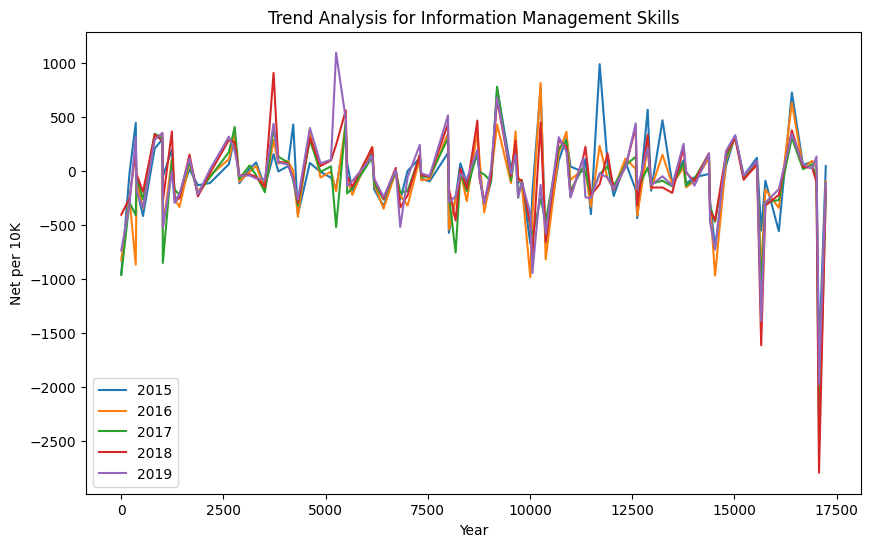

In [60]:
import matplotlib.pyplot as plt

# Example: Plotting trend of a specific skill group over years
skill_trend = df[df['skill_group_name'] == 'Software Testing']

plt.figure(figsize=(10,6))
plt.plot(skill_trend['net_per_10K_2015'], label='2015')
plt.plot(skill_trend['net_per_10K_2016'], label='2016')
plt.plot(skill_trend['net_per_10K_2017'], label='2017')
plt.plot(skill_trend['net_per_10K_2018'], label='2018')
plt.plot(skill_trend['net_per_10K_2019'], label='2019')
plt.title('Trend Analysis for Information Management Skills')
plt.xlabel('Year')
plt.ylabel('Net per 10K')
plt.legend()
plt.show()
